# Part II - Airline On-Time Performance Data for Summer 2022
## by Manon Mason



## Investigation Overview



Working with the Airline On-Time Performance dataset, my main goal was to study the canceled and delayed flights over the summer of 2022 and find out any patterns or relationships between variables that could help predict those delays and cancellations.

We came away with two key insights:
-	Weather is one of the most disruptive problems regarding flying. Not only does it cause the most cancellations, but it also causes the longest delays.


- The timing of the flight does correlate with flight performance. Even though more flights happen in the Morning (between 6 am and noon), cancellations and delays happen more frequently and last longer in the Evening and the Afternoon.






## Dataset Overview



Airline On-Time Performance Data is a comprehensive dataset that provides valuable insights into US domestic airline performance, including carrier information, delays, and reasons for delays or cancellations. The dataset has over two millions rows and twenty nine columns. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('flight_copy.csv')

## WEATHER

Weather is the leading cause of cancellation. However, it ranks low on delays, being second to last. We can deduce from this that most airlines decide to cancel, rather than delay, their flights when significant meteorological conditions are forecasted or currently happening. 

Even though delays due to the weather happen less frequently than others; when they do occur, they cause delays of an hour on average. 

Looking at the distribution of the weather delay through a histogram (logscale), we notice most of the data points are around the 60-minute mark, with some outliers at the 2800-minute (46-hour) tick on the x-axis.


In [3]:
xticks_order = df['CANCELLATION_CODE'].value_counts(ascending=False).index
xticks_order
xticks_labels= ['Weather', 'Carrier', 'NAS', 'Security']

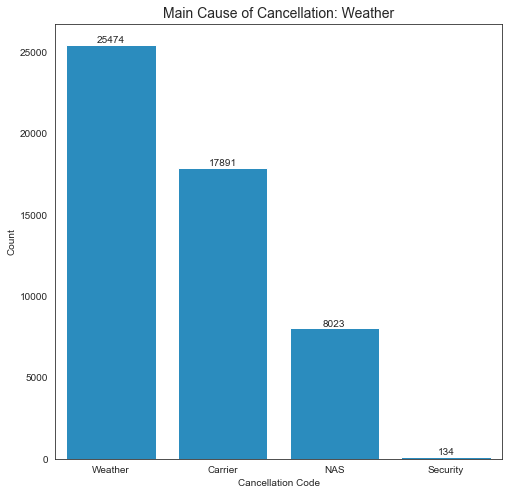

In [4]:
plt.figure(figsize=(8,8))
sns.set_style("white")
ax = sns.countplot(data = df,  x ='CANCELLATION_CODE', color='#2b8cbe', order=xticks_order, saturation=1)
plt.xlabel('Cancellation Code')
plt.ylabel('Count')
plt.title('Main Cause of Cancellation: Weather', fontsize=14)
ax.set_xticklabels(xticks_labels)
ax.bar_label(ax.containers[0]);

In [5]:
df_subset = df[['CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df_melt = df_subset.melt(value_vars =['CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], var_name='DELAY', value_name='MINUTE')
df_melt = df_melt.dropna()
x_values = df_melt['DELAY'].value_counts().index
height = df_melt['DELAY'].value_counts().values
y_ticks = ['50k', '100k', '150k', '200k', '250k','300k']
x_ticks = ['CARRIER', 'LATE AIRCRAFT', 'NAS', 'WEATHER', 'SECURITY']

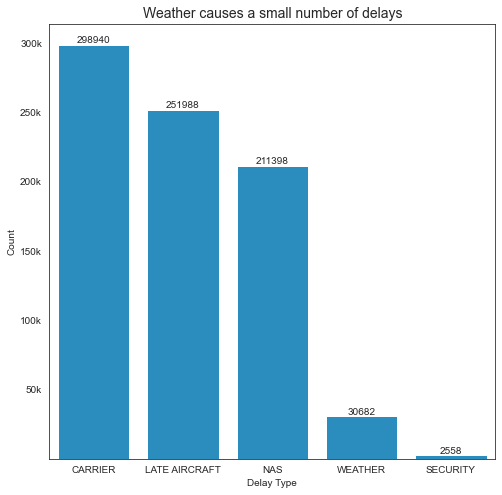

In [6]:
plt.figure(figsize=(8,8))
sns.set_style("white")
ax = sns.barplot(x_values, height, color='#2b8cbe', saturation=1)
plt.xlabel('Delay Type')
plt.ylabel('Count')
plt.title('Weather causes a small number of delays', fontsize=14)
ax.set_yticks([50000, 100000, 150000, 200000, 250000, 300000])
ax.set_yticklabels(y_ticks)
ax.set_xticklabels(x_ticks)
ax.bar_label(ax.containers[0]);

In [7]:
delay_mean = df_melt.groupby('DELAY')['MINUTE'].mean().reset_index().sort_values(by='MINUTE', ascending=False)
delay_mean

,DELAY,MINUTE
4,WEATHER_DELAY,62.066065
1,LATE_AIRCRAFT_DELAY,50.663246
0,CARRIER_DELAY,43.860022
3,SECURITY_DELAY,31.187647
2,NAS_DELAY,26.559632


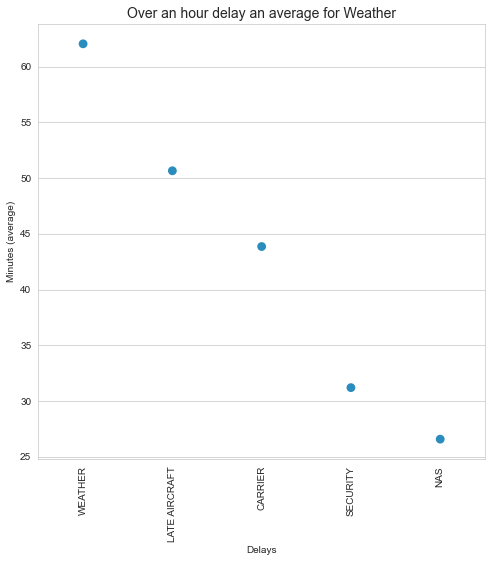

In [8]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
ax = sns.pointplot(data=delay_mean, x='DELAY', y='MINUTE', linestyles="", color='#2b8cbe')
plt.xticks(rotation=90)
plt.ylabel('Minutes (average)')
plt.xlabel('Delays')
plt.title('Over an hour delay an average for Weather',fontsize=14)
ax.set_xticklabels(['WEATHER', 'LATE AIRCRAFT', 'CARRIER', 'SECURITY', 'NAS']);

In [9]:
np.log10(df['WEATHER_DELAY'].describe())
bins = 10 ** np.arange(0, 3.18+0.2, 0.2)
xticks = [1, 5, 15, 30, 60, 120, 240, 1200, 2800]
labels = ['{}'.format(v) for v in xticks]

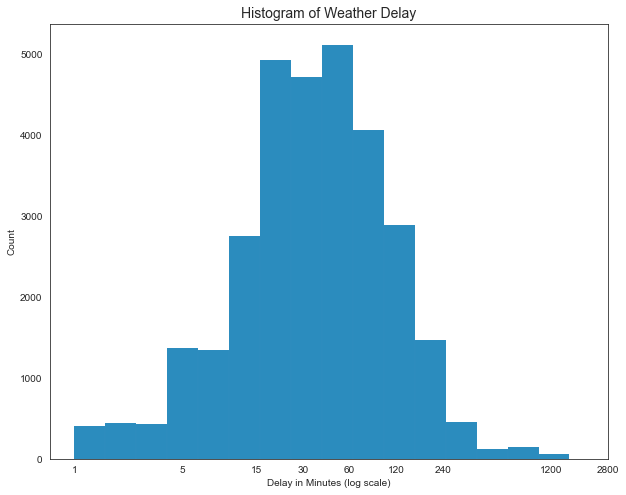

In [10]:
plt.figure(figsize=(10,8))
sns.set_style("white")
ax = sns.histplot(df['WEATHER_DELAY'], bins=bins, color='#2b8cbe', alpha=1)
plt.xscale('log')
plt.xticks(xticks, labels)
plt.ylabel('Count')
plt.xlabel('Delay in Minutes (log scale)')
plt.title('Histogram of Weather Delay', fontsize=14);

## TIME OF DAY

We have divided the day into four bins:

- Morning: 6 am-noon
- Afternoon: noon - 6 pm
- Evening: 6 pm-midnight
- Night: Midnight - 6 am

Most flights happen in the morning. However, when we look at how the cancellations and delays are spread throughout the day, we see that most occur in the evening and afternoon.

Almost 50% of the evening and 45% of the afternoon flights get canceled.

When splitting the delays by length, we can closely examine the relationship between time of day and delay.

The bins are as follows:

- Less than an hour later
- 1 to 2 hours late
- 2 to 4 hours late 
- 4 to 8 hours late
- 8 to 12 hours late
- 12 to 24 hours late
- Over 24 hours late

We can see that the time of day and delay are correlated: on top of having the highest percentage of delays in the evening and afternoon, they also have longer delays compared to flights in the morning or at night. 

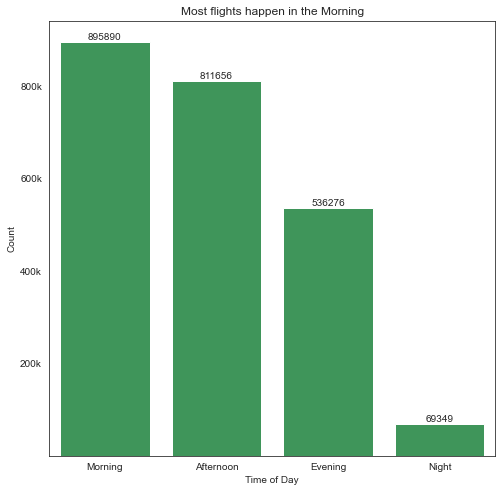

In [11]:
plt.figure(figsize=(8,8))
sns.set_style("white")
ax = sns.countplot(data = df, x = 'TIME_OF_DAY', color ='#31a354')
plt.ylabel('Count')
plt.xlabel('Time of Day')
plt.title('Most flights happen in the Morning')
ax.set_yticks([200000, 400000, 600000, 800000])
ax.set_yticklabels(['200k', '400k', '600k', '800k'])
ax.bar_label(ax.containers[0]);

In [12]:
df['TIME_OF_DAY'] =  pd.Categorical(df['TIME_OF_DAY'], categories=['Morning', 'Afternoon', 'Evening', 'Night'], ordered=True)
tod_delay = df.groupby('TIME_OF_DAY')['ARR_DELAY_NEW'].count()
tod_total = df.groupby('TIME_OF_DAY')['ARR_TIME'].count()
tod_perc = np.round(tod_delay / tod_total * 100, 2)
tod_perc = tod_perc.reset_index().rename(columns={0: "DELAY_PERCENTAGE"})
tod_canceled = np.round((df.groupby('TIME_OF_DAY')['CANCELLATION_CODE'].count()\
                          / df['TIME_OF_DAY'].value_counts()) *100,2)
tod_canceled = tod_canceled.reset_index().rename(columns={0: "CANCELLED_PERC"})
master_del_canc = pd.merge(tod_canceled, tod_perc).rename(columns={'CANCELLED_PERC': 'CANCELLED', 'DELAY_PERCENTAGE': 'DELAYED'})
melt_df = master_del_canc.melt(id_vars='TIME_OF_DAY',\
                               value_vars =['CANCELLED', 'DELAYED'], var_name='TYPE', value_name='PERCENTAGE')


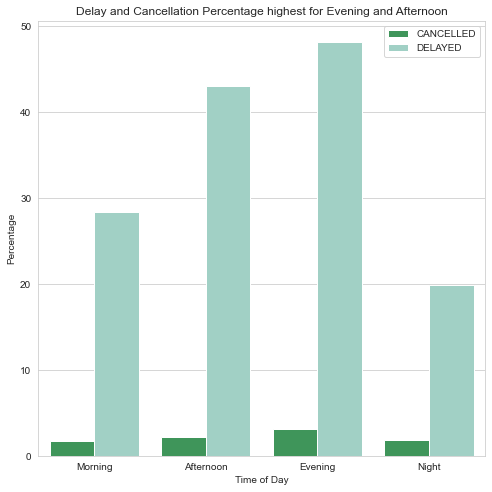

In [13]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.barplot(data=melt_df, x='TIME_OF_DAY', y='PERCENTAGE', hue='TYPE', palette=['#31a354', '#99d8c9'])
plt.ylabel('Percentage')
plt.xlabel('Time of Day')
plt.legend(title='')
plt.title('Delay and Cancellation Percentage highest for Evening and Afternoon');

In [14]:
delay_list = list(['Less than an hour late', '1 to 2 hours late', '2 to 4 hours late', '4 to 8 hours late', '8 to 12 hours late', 
          '12 to 24 hours late', 'Over 24hours late'])
filt = df['ARR_DELAY_BINS'].isin(delay_list)
delay_df =  df.loc[filt]
tod_count = df['TIME_OF_DAY'].value_counts().reset_index().rename(columns={'index':'TIME_OF_DAY', 'TIME_OF_DAY':'COUNT'})
delay_df['ARR_DELAY_BINS'] =  pd.Categorical(delay_df['ARR_DELAY_BINS'], categories=['Less than an hour late', '1 to 2 hours late', '2 to 4 hours late', '4 to 8 hours late', '8 to 12 hours late', 
          '12 to 24 hours late', 'Over 24hours late'], ordered=True)
bins_count = delay_df.groupby(['ARR_DELAY_BINS', 'TIME_OF_DAY']).size().reset_index().rename(columns={0:'COUNT'})
tod_per = bins_count.merge(tod_count, on='TIME_OF_DAY')
tod_per['PERCENTAGE'] = round((tod_per['COUNT_x'] / tod_per['COUNT_y']) *100, 3)
tod_per_sub = tod_per.sort_values(by='ARR_DELAY_BINS').reset_index(drop=True)
tod_per_sub = tod_per_sub.iloc[8:]

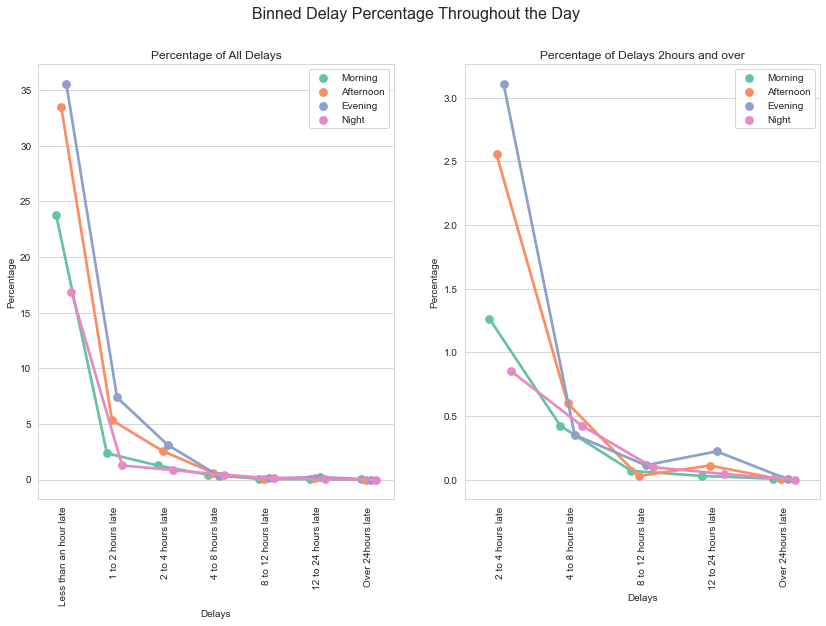

In [15]:
palette = sns.color_palette("Set2")
fig = plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.pointplot(data=tod_per, x='ARR_DELAY_BINS', y='PERCENTAGE', hue='TIME_OF_DAY', dodge=0.3, palette=palette)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Delays')
plt.title('Percentage of All Delays')
plt.legend(title='')

plt.subplot(1,2,2)
sns.pointplot(data=tod_per_sub, x='ARR_DELAY_BINS', y='PERCENTAGE', hue='TIME_OF_DAY', dodge=0.3, palette=palette,\
             order=['2 to 4 hours late', '4 to 8 hours late', '8 to 12 hours late', '12 to 24 hours late', 'Over 24hours late'])
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Delays')
plt.title('Percentage of Delays 2hours and over')
plt.legend(title='')
fig.suptitle('Binned Delay Percentage Throughout the Day', fontsize=16);

In [16]:
!jupyter nbconvert SLIDE_DECK.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook SLIDE_DECK.ipynb to slides
[NbConvertApp] Writing 789158 bytes to SLIDE_DECK.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Manon\anaconda3\envs\trainingspace\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Manon\anaconda3\envs\trainingspace\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Manon\anaconda3\envs\trainingspace\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Manon\anaconda3\envs\trainingspace\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Manon\anaconda3\envs\trainingspace\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in